In [22]:
import data_generator as tsg
import pandas as pd
import numpy as np 
from matplotlib import pyplot
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

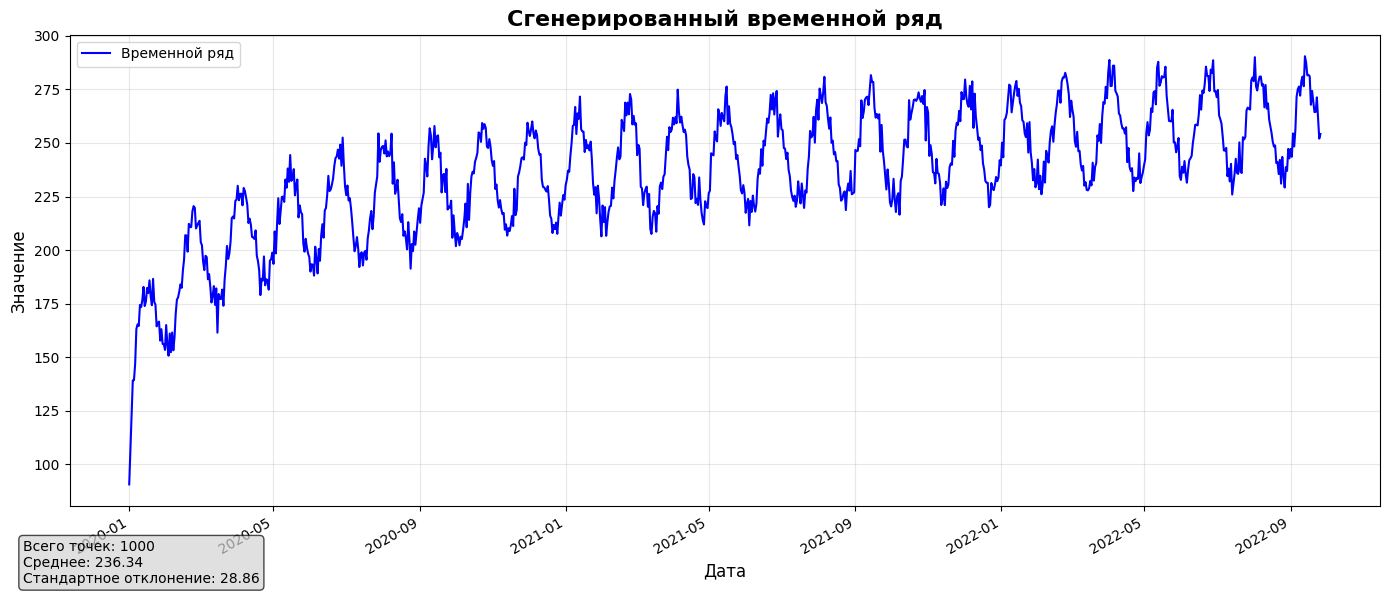

In [23]:
dates_strings, values = tsg.generate_time_series(n_points=1000, seed=42)
dates = [datetime.strptime(date_str, '%Y-%m-%d') for date_str in dates_strings]
tsg.plot_time_series(dates_strings, values)

# ADF test

In [24]:
regression_types = ['c', 'ct', 'ctt', 'n']

for regression_type in regression_types:
    test_result = adfuller(values, regression = regression_type)
    print("ADF test for", regression_type, "regression type: ")
    print("\tADF Statistic:", test_result[0])
    print("\tp-value:", test_result[1])
    print("\tCritical Values:")
    for key, value in test_result[4].items():
        print(f"\t{key}: {value}")

ADF test for c regression type: 
	ADF Statistic: -4.565409543996062
	p-value: 0.0001495207928082543
	Critical Values:
	1%: -3.43706091543889
	5%: -2.8645028204932483
	10%: -2.568347558984588
ADF test for ct regression type: 
	ADF Statistic: -5.818701185557299
	p-value: 5.236866332313863e-06
	Critical Values:
	1%: -3.9680661492141187
	5%: -3.414993271500572
	10%: -3.1297006047557043
ADF test for ctt regression type: 
	ADF Statistic: -6.8375403895886535
	p-value: 1.899297492240466e-07
	Critical Values:
	1%: -4.383028886582756
	5%: -3.838447940584914
	10%: -3.557011365600491
ADF test for n regression type: 
	ADF Statistic: 1.8247519893429995
	p-value: 0.9844089957099598
	Critical Values:
	1%: -2.568032233761363
	5%: -1.9412784150528326
	10%: -1.6165509634792599


In [25]:
D = 1

# KPSS test

In [26]:
regression_types = ['c', 'ct']

for regression_type in regression_types:
    test_result = kpss(values, regression = regression_type)
    print("KPSS test for", regression_type, "regression type: ")
    print("\tKPSS Statistic:", test_result[0])
    print("\tp-value:", test_result[1])
    print("\tCritical Values:")
    for key, value in test_result[3].items():
        print(f"\t{key}: {value}")

KPSS test for c regression type: 
	KPSS Statistic: 3.3717583894855183
	p-value: 0.01
	Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
KPSS test for ct regression type: 
	KPSS Statistic: 0.36376595555621155
	p-value: 0.01
	Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


C:\Users\yaggod\AppData\Local\Temp\ipykernel_1196\2513468067.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  test_result = kpss(values, regression = regression_type)
C:\Users\yaggod\AppData\Local\Temp\ipykernel_1196\2513468067.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  test_result = kpss(values, regression = regression_type)


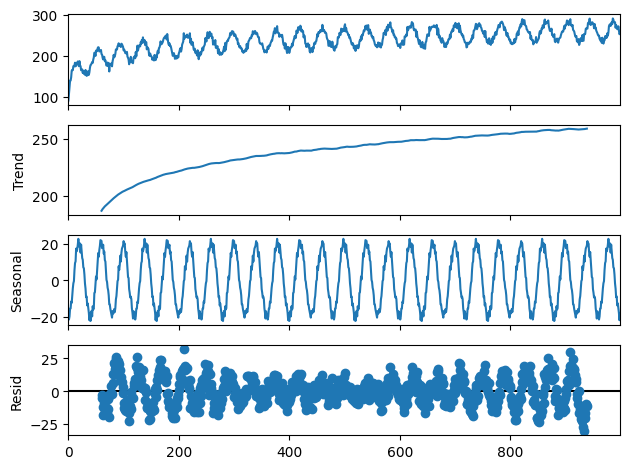

In [27]:
series = pd.Series(values)
s = 120
result = seasonal_decompose(series, model='additive', period=s)
result.plot()
pyplot.show()

# PACF & ACF plots

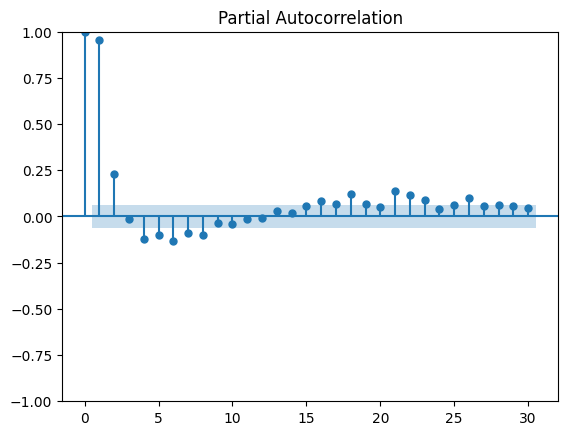

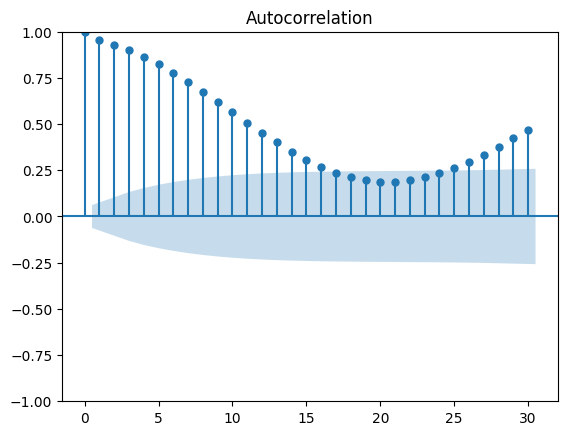

In [28]:
plot_pacf(values)
plot_acf(values)
pacf_values = pacf(values)
acf_values = acf(values)

In [29]:
p, q, d = 1, 1, 1

# SARIMAX model
Для моделирования была выбрана модель SARIMAX, как самая продвинутая и учитывающая в себе все необходимые для созданного временного ряда компоненты модель

In [30]:
P, Q = 0, 0
model = SARIMAX(values, order=(p, d, q), seasonal_order=(P, D, Q, s))

sarimax_result = model.fit()

In [31]:
n_points = 200
new_dates = [(dates[-1] + timedelta(days=i)) for i in range(n_points)]

forecast = sarimax_result.get_forecast(n_points)
new_values = forecast.predicted_mean
intervals = forecast.conf_int()
lower, upper = zip(*intervals)

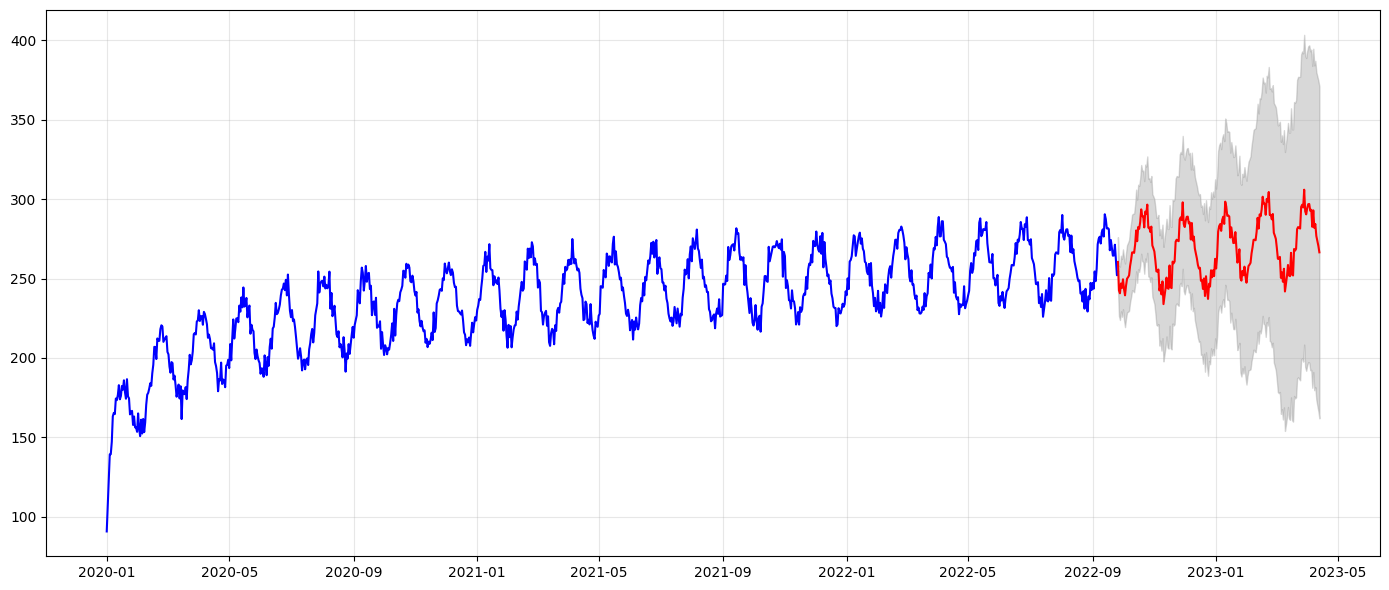

In [32]:
pyplot.figure(figsize=(14, 6))

pyplot.plot(dates, values, color='b', linewidth=1.5)
pyplot.plot(new_dates, new_values, color='r', linewidth=1.5)
pyplot.fill_between(new_dates, lower, upper, color='gray', alpha=0.3)
pyplot.grid(True, alpha=0.3)

pyplot.tight_layout()
pyplot.show()

# Metrics

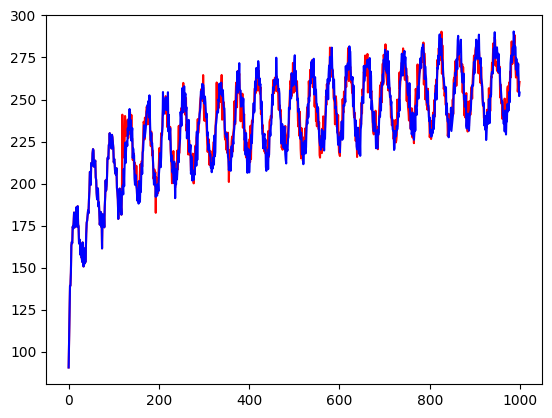

MSE:	 56.84035162898976
MAE:	 5.6552422442068755


In [33]:
predicted = sarimax_result.predict(start = 1, end = len(values)) # for some reason 0th value is a bit too off so ig its starting counting from 1

pyplot.plot(predicted, color = 'r')
pyplot.plot(values, color='b')

pyplot.show()

mae = mean_absolute_error(values, predicted)
mse = mean_squared_error(values, predicted)

print("MSE:\t", mse)
print("MAE:\t", mae)